In [ ]:
# Parameters
actions = ["U", "D", "L", "R"]
max_ep = 50
batch_size = 64
alpha = 0.0001
gamma = 0.95
eta = 0.01
episodes = 5000
epsilon = 0.999
N_QU = 1


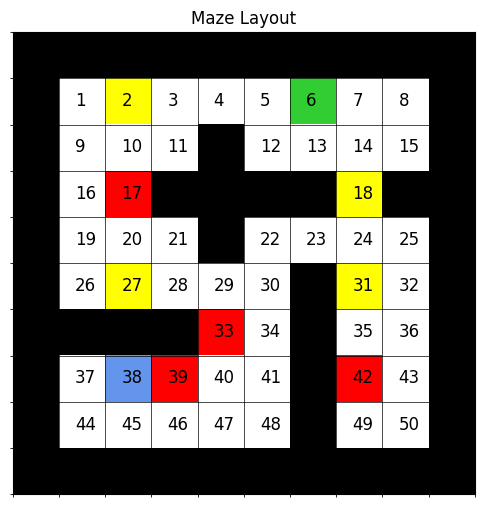

Episode 1/5000 -- Reward: -120.20, Loss: 0.00
Episode 2/5000 -- Reward: -107.60, Loss: 22537.01
Episode 3/5000 -- Reward: -111.20, Loss: 25043.69
Episode 4/5000 -- Reward: -71.60, Loss: 20584.44
Episode 5/5000 -- Reward: -91.20, Loss: 17932.13
Episode 6/5000 -- Reward: -67.20, Loss: 16933.34
Episode 7/5000 -- Reward: 65.60, Loss: 6879.63
Episode 8/5000 -- Reward: -97.60, Loss: 89142.40
Episode 9/5000 -- Reward: 66.00, Loss: 47258.36
Episode 10/5000 -- Reward: -108.00, Loss: 212197.92
Episode 11/5000 -- Reward: 66.40, Loss: 78925.07
Episode 12/5000 -- Reward: 96.20, Loss: 21684.16
Episode 13/5000 -- Reward: -147.00, Loss: 331594.73
Episode 14/5000 -- Reward: -133.00, Loss: 259993.39
Episode 15/5000 -- Reward: -113.00, Loss: 221484.22
Episode 16/5000 -- Reward: -125.40, Loss: 151719.56
Episode 17/5000 -- Reward: 94.40, Loss: 21238.59
Episode 18/5000 -- Reward: -121.20, Loss: 286920.86
Episode 19/5000 -- Reward: -114.60, Loss: 207929.99
Episode 20/5000 -- Reward: 13.60, Loss: 233462.41
Ep

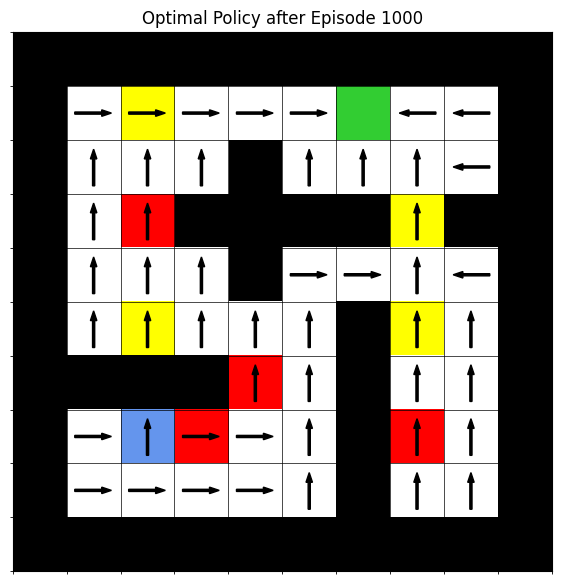

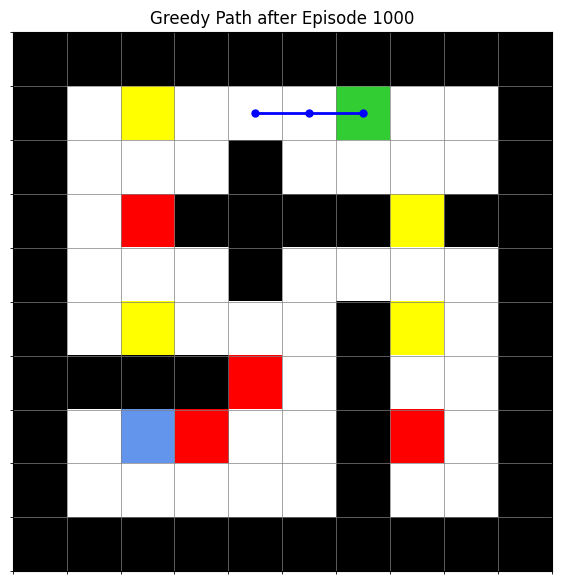

Episode 1001/5000 -- Reward: 98.00, Loss: 12304.28
Episode 1002/5000 -- Reward: 89.00, Loss: 10354.54
Episode 1003/5000 -- Reward: 46.80, Loss: 66322.94
Episode 1004/5000 -- Reward: 96.20, Loss: 9664.88
Episode 1005/5000 -- Reward: 98.00, Loss: 5458.07
Episode 1006/5000 -- Reward: 84.00, Loss: 14048.22
Episode 1007/5000 -- Reward: 97.00, Loss: 6844.27
Episode 1008/5000 -- Reward: 87.00, Loss: 19543.39
Episode 1009/5000 -- Reward: 82.60, Loss: 19779.02
Episode 1010/5000 -- Reward: 77.20, Loss: 27450.27
Episode 1011/5000 -- Reward: 87.00, Loss: 17118.04
Episode 1012/5000 -- Reward: 86.00, Loss: 17849.80
Episode 1013/5000 -- Reward: 85.00, Loss: 18756.61
Episode 1014/5000 -- Reward: 82.40, Loss: 22593.88
Episode 1015/5000 -- Reward: 81.00, Loss: 34273.94
Episode 1016/5000 -- Reward: 87.20, Loss: 17797.12
Episode 1017/5000 -- Reward: 80.00, Loss: 23118.00
Episode 1018/5000 -- Reward: 69.60, Loss: 30523.25
Episode 1019/5000 -- Reward: 85.20, Loss: 12367.00
Episode 1020/5000 -- Reward: 60.40

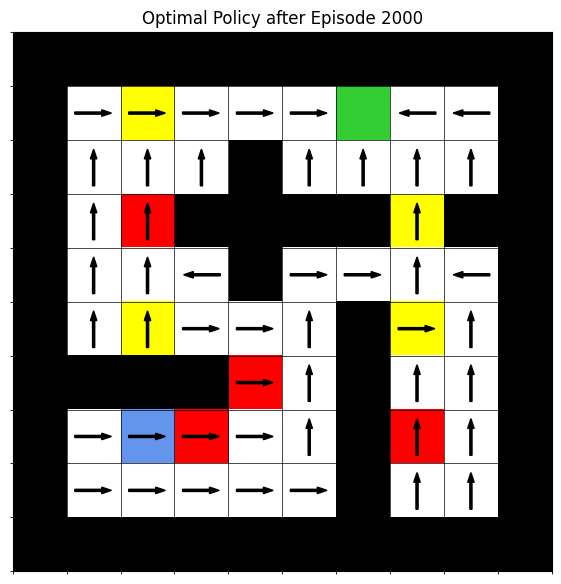

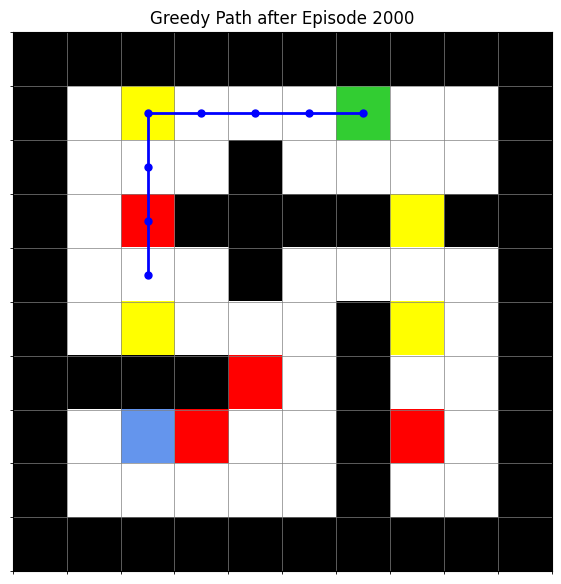

Episode 2001/5000 -- Reward: 89.00, Loss: 2075.64
Episode 2002/5000 -- Reward: 82.00, Loss: 2841.54
Episode 2003/5000 -- Reward: 98.00, Loss: 962.60
Episode 2004/5000 -- Reward: 98.00, Loss: 952.77
Episode 2005/5000 -- Reward: 90.00, Loss: 2618.78
Episode 2006/5000 -- Reward: 96.00, Loss: 1650.89
Episode 2007/5000 -- Reward: 77.00, Loss: 2735.80
Episode 2008/5000 -- Reward: 89.00, Loss: 1847.33
Episode 2009/5000 -- Reward: 89.00, Loss: 2701.40
Episode 2010/5000 -- Reward: 95.20, Loss: 1514.62
Episode 2011/5000 -- Reward: 86.00, Loss: 4306.12
Episode 2012/5000 -- Reward: 86.00, Loss: 3922.68
Episode 2013/5000 -- Reward: 98.00, Loss: 668.08
Episode 2014/5000 -- Reward: 90.00, Loss: 2243.30
Episode 2015/5000 -- Reward: 85.00, Loss: 9903.05
Episode 2016/5000 -- Reward: 73.20, Loss: 5777.39
Episode 2017/5000 -- Reward: 88.00, Loss: 2525.98
Episode 2018/5000 -- Reward: 97.00, Loss: 1333.53
Episode 2019/5000 -- Reward: 87.20, Loss: 2716.34
Episode 2020/5000 -- Reward: 68.20, Loss: 4477.91
Epi

KeyboardInterrupt: 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import torch.nn.functional as F

########################################
# Maze Construction (as provided)      #
########################################

# Maze rewards and cell definitions.
reward = np.zeros((10, 10))

wall = -0.8
bump = -10
oil = -5
goal = 100
start = 0

# Surrounding boundaries as walls.
reward[:, 0] = wall
reward[0, :] = wall
reward[:, 9] = wall
reward[9, :] = wall

# First row: oil at (1,2) and goal at (1,6).
reward[1, 2] = oil; reward[1, 6] = goal
# Second row: a wall at (2,4).
reward[2, 4] = wall
# Third row: bump and walls.
reward[3, 2] = bump; reward[3, 3:7] = wall; reward[3, 7] = oil; reward[3, 8] = wall
# Fourth row: wall at (4,4).
reward[4, 4] = wall
# Fifth row: oil and walls.
reward[5, 2] = oil; reward[5, 6] = wall; reward[5, 7] = oil
# Sixth row: walls and bump.
reward[6, 1:4] = wall; reward[6, 4] = bump; reward[6, 6] = wall
# Seventh row: designated start cell (used previously) and bump cells.
reward[7, 2] = start; reward[7, 3] = bump; reward[7, 6] = wall; reward[7, 7] = bump
# Eighth row: wall at (8,6).
reward[8, 6] = wall

# Build state_matrix: assign a sequential number (starting at 1) to every cell that is not a wall.
state_matrix = np.zeros((10, 10), dtype=int)
counter = 1
for i in range(10):
    for j in range(10):
        if reward[i, j] != wall:
            state_matrix[i, j] = counter
            counter += 1

# Build mapped_maze for visualization using a colormap.
mapped_maze = np.zeros_like(reward)
mapped_maze[reward == wall] = 1    # Wall -> Black
mapped_maze[reward == bump] = 2     # Bump -> Red
mapped_maze[reward == oil] = 3      # Oil -> Yellow
mapped_maze[reward == goal] = 4     # Goal -> LimeGreen
mapped_maze[7, 2] = 5               # Start -> CornflowerBlue

# (Optional plot of maze for verification)
cmap_vis = plt.matplotlib.colors.ListedColormap(["white", "black", "red", "yellow", "limegreen", "cornflowerblue"])
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(mapped_maze, cmap=cmap_vis, origin="upper")
ax.set_xticks(np.arange(-0.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 10, 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
for s in np.nditer(state_matrix[state_matrix != 0]):
    i = np.where(state_matrix == s)[0][0]
    j = np.where(state_matrix == s)[1][0]
    plt.text(j-0.15, i+0.1, str(int(s)), size=12)
ax.set_xticks([])
ax.set_yticks([])
plt.title("Maze Layout")
plt.show()

########################################
# Provided next_state Function         #
########################################

def next_state(s, a, p=0.025):
    # Given a state s (an integer from state_matrix) and an action a (as a letter), 
    # determine the next state and reward.
    row = np.where(state_matrix == s)[0][0]
    col = np.where(state_matrix == s)[1][0]
    s1 = [row, col]

    moves = {
        'U': [(-1, 0), (0, -1), (0, 1)],  # Up, Left, Right
        'D': [(1, 0), (0, -1), (0, 1)],   # Down, Left, Right
        'R': [(0, 1), (-1, 0), (1, 0)],    # Right, Up, Down
        'L': [(0, -1), (-1, 0), (1, 0)]     # Left, Up, Down
    }
    
    probabilities = [1 - p, p / 2, p / 2]  # Main move and two deviations
    move = moves.get(a)
    chosen_move = move[np.random.choice([0, 1, 2], p=probabilities)]
    i = s1[0] + chosen_move[0]
    j = s1[1] + chosen_move[1]
    R = reward[i, j] - 1  # subtract one for action cost
    if reward[i, j] == wall:
        s2 = state_matrix[row, col]  # if hitting a wall, remain in current state
    else:
        s2 = state_matrix[i, j]

    return R, s2

########################################
# Maze Environment Class               #
########################################

class MazeEnv:
    def __init__(self, p=0.025, max_steps=50):
        self.p = p
        self.max_steps = max_steps
        self.steps = 0
        # Instead of a fixed start, we now allow reset( ) to choose a random valid starting state.
    
    def reset(self):
        self.steps = 0
        # Choose a random cell that is not a wall and not the goal.
        valid_indices = np.argwhere((reward != wall) & (reward != goal))
        chosen_index = valid_indices[random.randrange(len(valid_indices))]
        row, col = chosen_index
        self.state = state_matrix[row, col]
        return self.get_state_vector()
    
    def get_state_vector(self):
        # Convert current state (an integer in state_matrix) to its (row, col) coordinate.
        pos = np.where(state_matrix == self.state)
        row = pos[0][0]
        col = pos[1][0]
        return np.array([row, col], dtype=np.float32)
    
    def step(self, action_index):
        self.steps += 1
        # Map action index to letter.
        action_map = {0: 'U', 1: 'R', 2: 'D', 3: 'L'}
        action_letter = action_map[action_index]
        R, new_state = next_state(self.state, action_letter, p=self.p)
        self.state = new_state
        pos = np.where(state_matrix == self.state)
        row = pos[0][0]
        col = pos[1][0]
        done = False
        # End episode if the current cell's reward equals goal or if max_steps reached.
        if reward[row, col] == goal or self.steps >= self.max_steps:
            done = True
        return self.get_state_vector(), R, done

########################################
# Replay Memory                        #
########################################

class ReplayMemory:
    def __init__(self, capacity=5000):
        self.capacity = capacity
        self.memory = deque(maxlen=capacity)
    
    def push(self, transition):
        self.memory.append(transition)
    
    def sample(self, batch_size=64):
        return random.sample(self.memory, batch_size)
    
    def __len__(self):
        return len(self.memory)

########################################
# Q-Network and DQN Agent              #
########################################

class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(2, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 128)
        self.layer4 = nn.Linear(128, 4)
    
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        return self.layer4(x)

class DQNAgent:
    def __init__(self, device='cpu'):
        self.device = device
        self.q_network = DQN().to(device)
        self.target_network = DQN().to(device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=alpha)
        self.memory = ReplayMemory(capacity=5000)
        self.batch_size = batch_size
        self.gamma = gamma
        self.eta = eta

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return random.randrange(4)
        else:
            state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
            q_vals = self.q_network(state_tensor)
            return q_vals.argmax().item()

    def store_transition(self, transition):
        self.memory.push(transition)

    def update(self):
        if len(self.memory) < self.batch_size:
            return 0.0
        transitions = self.memory.sample(self.batch_size)
        states = torch.FloatTensor([t[0] for t in transitions]).to(self.device)
        actions = torch.LongTensor([t[1] for t in transitions]).unsqueeze(1).to(self.device)
        rewards = torch.FloatTensor([t[2] for t in transitions]).unsqueeze(1).to(self.device)
        next_states = torch.FloatTensor([t[3] for t in transitions]).to(self.device)
        dones = torch.FloatTensor([float(t[4]) for t in transitions]).unsqueeze(1).to(self.device)
        
        q_vals = self.q_network(states).gather(1, actions)
        next_q = self.target_network(next_states).max(1, keepdim=True)[0]
        target_q = rewards + self.gamma * next_q * (1 - dones)
        loss = nn.MSELoss(reduction="sum")(q_vals, target_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Soft update of target network parameters.
        for target_param, param in zip(self.target_network.parameters(), self.q_network.parameters()):
            target_param.data.copy_(self.eta * param.data + (1.0 - self.eta) * target_param.data)
        return loss.item()

########################################
# Policy Extraction and Plotting       #
########################################

# Use your provided plot_policy function.
def plot_policy(policy, title='Optimal Policy'):
    cmap = plt.matplotlib.colors.ListedColormap(["white", "black", "red", "yellow", "limegreen", "cornflowerblue"])

    # Plot the maze with grid lines.
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(mapped_maze, cmap=cmap, origin="upper")
    ax.set_xticks(np.arange(-0.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 10, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.set_xticks([]); ax.set_yticks([])

    for s in np.nditer(state_matrix[(state_matrix != 6)]):
        i = np.where(state_matrix == s)[0][0]
        j = np.where(state_matrix == s)[1][0]
        if policy[int(s)-1] == "U":
            plt.arrow(j, i+0.35, 0, -0.5, width=0.04, color='black')
        elif policy[int(s)-1] == "R":
            plt.arrow(j-0.35, i, 0.5, 0, width=0.04, color='black')
        elif policy[int(s)-1] == "D":
            plt.arrow(j, i-0.35, 0, 0.50, width=0.04, color='black')
        elif policy[int(s)-1] == "L":
            plt.arrow(j+0.35, i, -0.5, 0, width=0.04, color='black')
    plt.title(title)
    plt.show()


# Extract current optimal policy from the Q-network.
def get_optimal_policy(agent):
    max_state = int(state_matrix.max())
    policy_list = [''] * max_state
    mapping = {0: 'U', 1: 'R', 2: 'D', 3: 'L'}
    for s in range(1, max_state+1):
        pos = np.where(state_matrix == s)
        if pos[0].size == 0:
            continue
        i = pos[0][0]
        j = pos[1][0]
        # Skip the cell if it represents the goal.
        if reward[i, j] == goal:
            continue
        state_vec = np.array([i, j], dtype=np.float32)
        with torch.no_grad():
            q_vals = agent.q_network(torch.FloatTensor(state_vec).unsqueeze(0).to(agent.device))
        best_action = q_vals.argmax().item()
        policy_list[s-1] = mapping[best_action]
    return policy_list

# Simulate a greedy episode (no exploration) and record the visited (row, col) path.
def simulate_episode(agent, env, max_steps=50):
    state = env.reset()
    path = [env.get_state_vector()]
    done = False
    steps = 0
    while not done and steps < max_steps:
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(agent.device)
        with torch.no_grad():
            q_vals = agent.q_network(state_tensor)
        action = q_vals.argmax().item()
        state, r, done = env.step(action)
        path.append(env.get_state_vector())
        steps += 1
    return np.array(path)

########################################
# Training Loop with Vivid Episode Plots#
########################################

def train_and_plot(agent, env, num_episodes=episodes):
    epi_rewards = []
    epi_losses = []
    
    # These lists will hold the moving average of last 25 episodes
    avg_rewards = []
    avg_losses  = []
    
    for ep in range(num_episodes):
        state = env.reset()
        total_reward = 0.0
        total_loss   = 0.0
        step_count = 0
        done = False
        
        while not done:
            # Epsilon schedule
            epsilon = max(0.1, 0.995**ep)
            
            # Select action
            action = agent.select_action(state, epsilon)
            
            # Environment step
            next_state, r, done = env.step(action)
            # Store transition
            agent.store_transition((state, action, r, next_state, done))
            state = next_state
            total_reward += r
            step_count += 1
            # Update the Q-network
            if step_count % N_QU == 0:
                loss_val = agent.update()
                total_loss += loss_val
        
        # Store sums for this episode
        epi_rewards.append(total_reward)
        epi_losses.append(total_loss)
        
        # Compute moving average over the last 25 episodes
        m = min(25, ep + 1)  # number of episodes so far or 25, whichever is smaller
        avg_r = np.mean(epi_rewards[-m:])
        avg_l = np.mean(epi_losses[-m:])
        avg_rewards.append(avg_r)
        avg_losses.append(avg_l)
        
        print(f"Episode {ep+1}/{num_episodes} -- Reward: {total_reward:.2f}, Loss: {total_loss:.2f}")
        
        # Every 100 episodes, visualize policy and a greedy path
        if (ep + 1) % 1000 == 0:
            greedy_path = simulate_episode(agent, env)
            policy_list = get_optimal_policy(agent)
            plot_policy(policy_list, title=f"Optimal Policy after Episode {ep+1}")
            
            # Overlay the greedy path
            plt.figure(figsize=(7,7))
            ax = plt.gca()
            ax.imshow(mapped_maze, cmap=cmap_vis, origin="upper")
            ax.set_xticks(np.arange(-0.5, 10, 1), minor=True)
            ax.set_yticks(np.arange(-0.5, 10, 1), minor=True)
            ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
            ax.set_xticks([]); ax.set_yticks([])
            plt.plot(greedy_path[:, 1], greedy_path[:, 0], marker='o', linestyle='-',
                    color='blue', linewidth=2, markersize=5)
            plt.title(f"Greedy Path after Episode {ep+1}")
            plt.show()
    
    # Plot the final average reward and average loss vs. episodes.
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(avg_rewards, label="Avg Reward (moving avg over 25)")
    plt.xlabel("Episode")
    plt.ylabel("Avg Reward")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(avg_losses, label="Avg Loss (moving avg over 25)", color="orange")
    plt.xlabel("Episode")
    plt.ylabel("Avg Loss")
    plt.legend()
    
    plt.suptitle("Moving Average of Reward and Loss Over Training")
    plt.show()
    
    return epi_rewards, epi_losses, avg_rewards, avg_losses

# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    env = MazeEnv(p=0.025, max_steps=50)
    agent = DQNAgent(device=device)
    rewards = train_and_plot(agent, env, num_episodes=episodes)

